In [6]:
# Imports
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.eval import geoguessr_score

# Get rid of pandas max width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Define top runs per solution
top_runs = {
    "prescribed_chain": "20240531185311",
    "single_agent": "20240531180501",
    "react_agent": "20240603162320",
    "multi_agent_supervisor": "20240601092758"
}


# Constants
DATA_DIR = "../data"

# Compile results
agg_results = {}
df = pd.DataFrame()
for key, value in top_runs.items():
    # Load results
    with open(f"{DATA_DIR}/results/runs/final/{key}_{value}.json", "r") as file:
        results = json.load(file)

    # Append dict to df
    if len(df) == 0:
        df = pd.DataFrame(results)
        df.index = [key]
    else:
        new_row = pd.DataFrame(results, index=[key])
        df = pd.concat([df, new_row])

# Get mean, min distance
t1_cols = [col for col in df.columns if int(col) <= 110]
t2_cols = [col for col in df.columns if int(col) >= 200]
df["mean"] = df[t1_cols + t2_cols].mean(axis=1)
df["mean_t1"] = df[t1_cols].mean(axis=1)
df["mean_t2"] = df[t2_cols].mean(axis=1)
df["min"] = df[t1_cols + t2_cols].min(axis=1)
df = df[sorted(df.columns)]
display(df)

# Get score (by tier)
df["total_score"] = 0
df["total_score_t1"] = 0
df["total_score_t2"] = 0
for index, row in df.iterrows():
    for col in df.columns:
        if col[0] in ["1", "2"]:
            score = geoguessr_score(df.at[index, col])
            df.at[index, "total_score"] += score
            if int(col) <= 110:
                df.at[index, "total_score_t1"] += score
            elif int(col) > 110:
                df.at[index, "total_score_t2"] += score

# Calculate normalized scores by the number of non-NA records for each score column
score_columns = ['total_score', 'total_score_t1', 'total_score_t2']
for index, row in df.iterrows():
    non_na_t1 = df.loc[index, '101':'110'].count()
    non_na_t2 = df.loc[index, '201':'210'].count()
    
    df.at[index, 'normalized_total_score_t1'] = df.at[index, 'total_score_t1'] / non_na_t1 if non_na_t1 > 0 else 0
    df.at[index, 'normalized_total_score_t2'] = df.at[index, 'total_score_t2'] / non_na_t2 if non_na_t2 > 0 else 0
    df.at[index, 'normalized_total_score'] = df.at[index, 'total_score'] / (non_na_t1 + non_na_t2) if (non_na_t1 + non_na_t2) > 0 else 0




/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_96412/1077340223.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row])
/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_96412/1077340223.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row])
/var/folders/ql/wv3pfscn16n97r2hyk2lf4bm0000gn/T/ipykernel_96412/1077340223.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. 

,101,102,103,104,105,106,107,108,109,110,201,202,203,204,205,206,207,208,209,210,mean,mean_t1,mean_t2,min
prescribed_chain,458.28,21.79,395.62,0.16,3.78,6.49,156.04,16.80,478.35,19.91,1330.19,NaN,16713.51,119.21,3728.55,10597.25,14.18,143.02,3845.52,1153.19,2063.254737,155.72200,4182.735556,0.16
single_agent,479.96,8.08,404.76,260.75,5.11,7.57,61.62,16.80,2138.00,655.48,2.90,84.34,752.53,156.01,NaN,3354.45,127.82,131.64,3914.08,12.27,661.798421,403.81300,948.448889,2.90
react_agent,271.34,21.79,NaN,261.19,3.77,7.57,155.96,4.10,NaN,41.85,NaN,86.00,58.76,NaN,NaN,NaN,2.92,99.11,300.41,NaN,101.136154,95.94625,109.440000,2.92
multi_agent_supervisor,252.04,8.52,395.39,262.13,4.40,7.57,156.04,11.24,363.37,19.91,NaN,NaN,70.51,96.08,132.18,1673.45,NaN,131.64,214.80,5.24,223.794706,148.06100,331.985714,4.40


## Metrics

## Plot Points

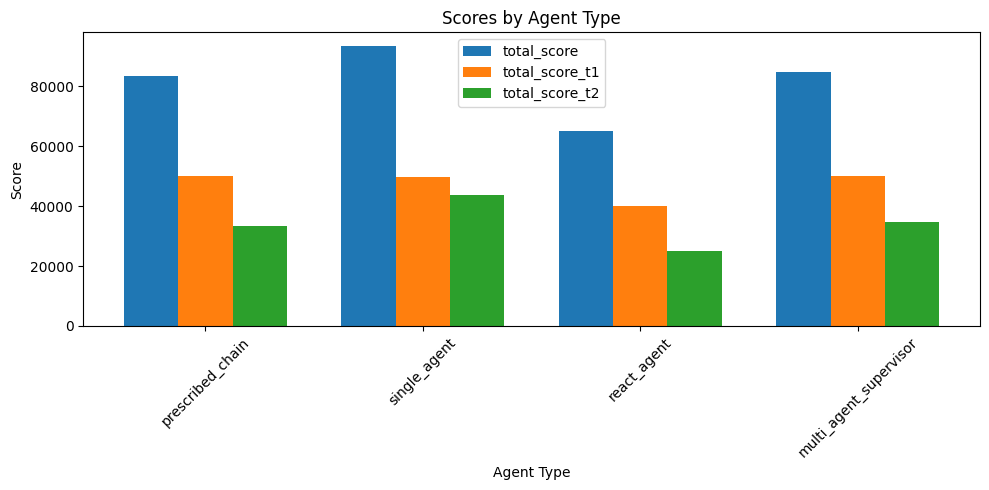

In [7]:
# Plot score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['total_score', 'total_score_t1', 'total_score_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Score')
plt.title('Scores by Agent Type')
plt.legend()
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


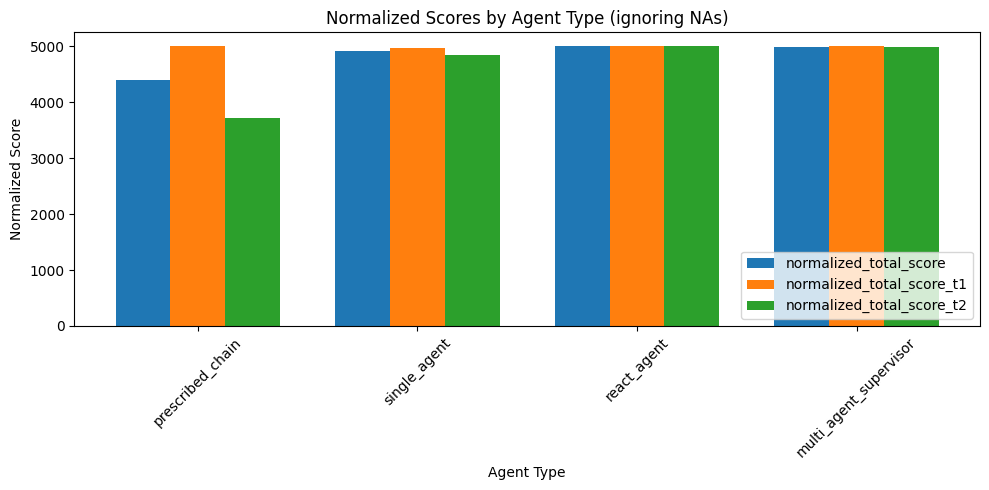

In [15]:
# Plot normalized score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['normalized_total_score', 'normalized_total_score_t1', 'normalized_total_score_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Normalized Score')
plt.title('Normalized Scores by Agent Type (ignoring NAs)')
plt.legend(loc='lower right')
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


### Average Distance (excluding NANs)

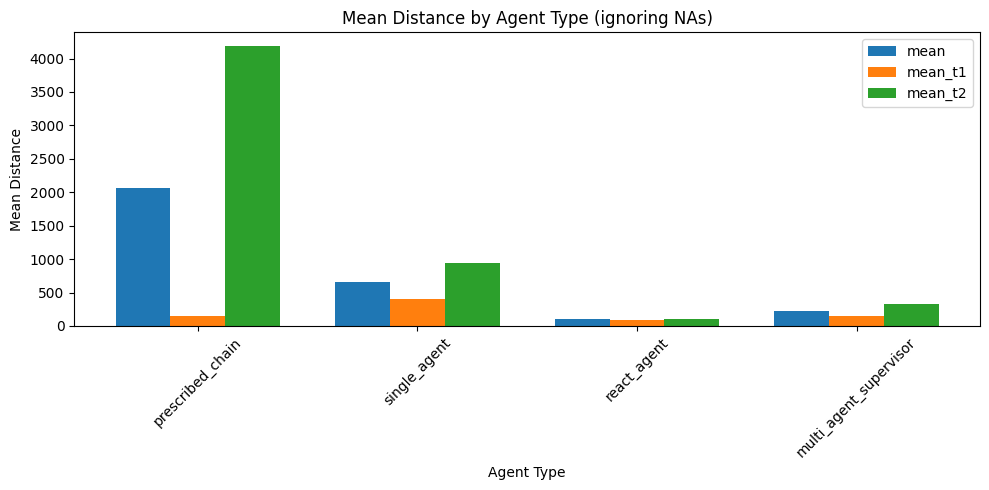

In [12]:
# Plot normalized score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['mean', 'mean_t1', 'mean_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Agent Type (ignoring NAs)')
plt.legend(loc='upper right')
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


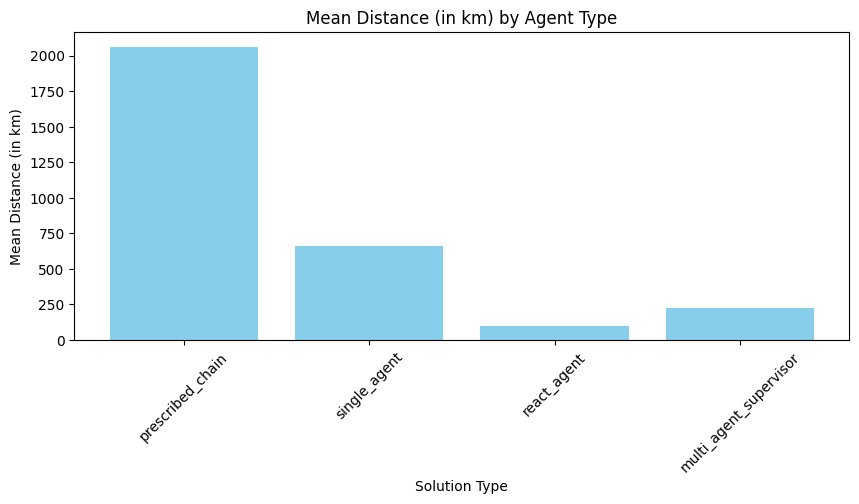

In [9]:
# Plot a bar chart of the mean column
plt.figure(figsize=(10, 4))
plt.bar(df.index, df['mean'], color='skyblue')
plt.xlabel('Solution Type')
plt.ylabel('Mean Distance (in km)')
plt.title('Mean Distance (in km) by Agent Type')
plt.xticks(rotation=45)
plt.show()

### Error Plots by Agent Type

#### 100 Level

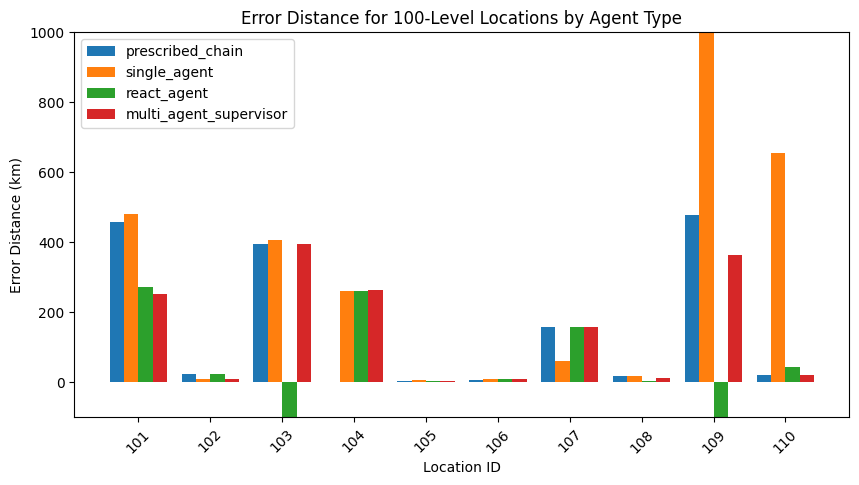

In [27]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
index_labels = df.index
bar_width = 0.2
x = np.arange(len(t1_cols))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, t1_cols].fillna(-99)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 100-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, t1_cols)
plt.xticks(rotation=45)
plt.ylim(-100, 1000)
plt.legend()
plt.show()


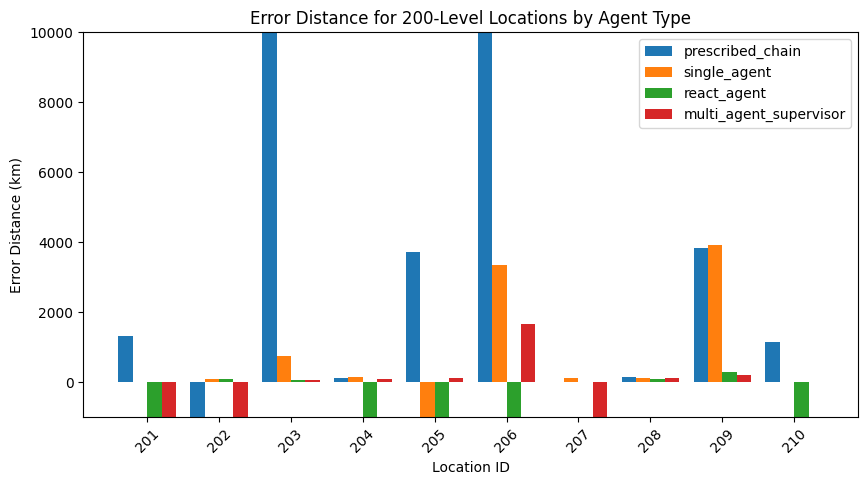

In [28]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
index_labels = df.index
bar_width = 0.2
x = np.arange(len(t2_cols))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, t2_cols].fillna(-999)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 200-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, t2_cols)
plt.xticks(rotation=45)
plt.ylim(-1000, 10000)
plt.legend()
plt.show()

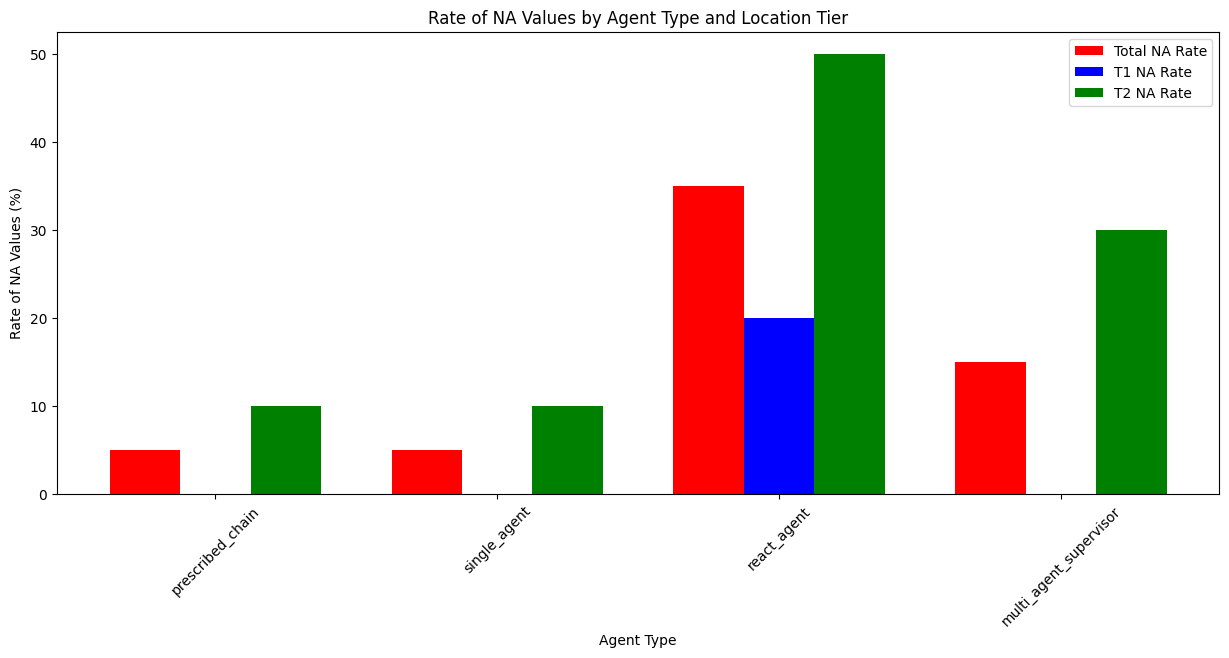

In [34]:
# Calculate the percentage of NA values for each index in the DataFrame and plot as a bar chart
# Splitting the NA count by total NA rate, NA rate for t1_cols and t2_cols

na_percentage_total = round(df[t1_cols + t2_cols].isna().mean(axis=1) * 100, 2)
na_percentage_t1 = round(df[t1_cols].isna().mean(axis=1) * 100, 2)
na_percentage_t2 = round(df[t2_cols].isna().mean(axis=1) * 100, 2)

plt.figure(figsize=(15, 6))
x = np.arange(len(df.index))
width = 0.25  # width of the bars

plt.bar(x, na_percentage_total, color='red', width=width, label='Total NA Rate')
plt.bar(x + width, na_percentage_t1, color='blue', width=width, label='T1 NA Rate')
plt.bar(x + 2 * width, na_percentage_t2, color='green', width=width, label='T2 NA Rate')

plt.xlabel('Agent Type')
plt.ylabel('Rate of NA Values (%)')
plt.title('Rate of NA Values by Agent Type and Location Tier')
plt.xticks(x + width, df.index, rotation=45)
plt.legend()
plt.show()
